Klasifikacija EKG signala.<br>
<br>
Dataset preuzet sa: https://www.kaggle.com/shayanfazeli/heartbeat<br>
Moody GB, Mark RG. The impact of the MIT-BIH Arrhythmia Database. IEEE Eng in Med and Biol 20(3):45-50 (May-June 2001). (PMID: 11446209)<br>
Goldberger AL, Amaral LAN, Glass L, Hausdorff JM, Ivanov PCh, Mark RG, Mietus JE, Moody GB, Peng C-K, Stanley HE. PhysioBank, PhysioToolkit, and PhysioNet: Components of a New Research Resource for Complex Physiologic Signals (2003). Circulation. 101(23):e215-e220.<br>
<br>
Damjan Prerad<br>
[1103/16]<br>
damjanovmail@gmail.com<br>
Elektrotehnicki fakulet u Banjoj Luci, Republika Srpska 78000<br>


Koristi se MITBIH dataset.<br>
Ovaj dataset ima 109446 elemenata koji se mogu podijeliti u 5 klasa. EKG signal je odmjeren frekvencijom 125Hz.
Klase su Classes: N, S, V, F, Q<br>
N -> Non-ecotic beats (normal beat)<br>
S -> Supraventricular ectopic beats<br>
V -> Ventricular ectopic beats<br>
F -> Fusion Beats<br>
Q -> Unknown Beat<br>
['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]<br>
<br>
.csv fajl posejduje 187 kolona i 87553 (za mitbih_train.csv)<br>
od 0 do 186 su odmjerci signala (1/125Hz * 187 = 1.5sec traje jedan primjerak) i oni su u prvih 186 kolona<br>
187ma kolona je kolona koja oznacava pripadnost signala nekoj klasi<br>
po redovima su razliciti signali<br><br>
https://blog.orikami.nl/exploring-heart-rate-variability-using-python-483a7037c64d<br>
http://www.lx.it.pt/~afred/papers/Review%20and%20Comparison%20of%20Real%20Time%20Electrocardiogram%20Segmentation%20Algorithms%20for%20Biometric%20Applications.pdf<br>


In [1]:
#!conda install ipython 


In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import math

In [2]:
mitbih = pd.read_csv("mitbih_test.csv", header=None)
mitbih_train = pd.read_csv("mitbih_train.csv", header=None)
#ptbdb_abnormal = pd.read_csv("ptbdb_abnormal.csv", header=None)
#ptbdb_normal = pd.read_csv("ptbdb_normal.csv", header=None)


In [45]:
print(ptbdb_abnormal)

NameError: name 'ptbdb_abnormal' is not defined

In [46]:
mitbih_train[187]=mitbih_train[187].astype(int)
equilibre=mitbih_train[187].value_counts()
print(equilibre)
print("Ukupno:")
print("U klasi normalnih                      : ", equilibre[0])
print("U klasi supraventrikularnih ektopičnih : ", equilibre[1])
print("U klasi ventrikularnih ektopičnih      : ", equilibre[2])
print("U klasi spojenih                       : ", equilibre[3])
print("U klasi nepoznatih                     : ", equilibre[4])
print(np.sum(equilibre))

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64
Ukupno:
U klasi normalnih                      :  72471
U klasi supraventrikularnih ektopičnih :  2223
U klasi ventrikularnih ektopičnih      :  5788
U klasi spojenih                       :  641
U klasi nepoznatih                     :  6431
87554


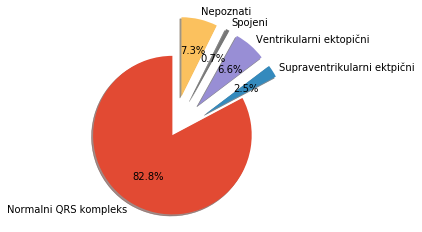

In [47]:
labels = 'Normalni QRS kompleks', 'Supraventrikularni ektpični', 'Ventrikularni ektopični', 'Spojeni', 'Nepoznati'
sizes = [72471, 2223, 5788, 641, 6431]
explode = (0, 0.5, 0.5, 0.5, 0.5)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

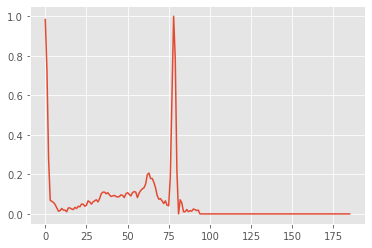

In [9]:
plt.style.use("ggplot")
plt.plot(mitbih_train.iloc[200,:186])
plt.show()

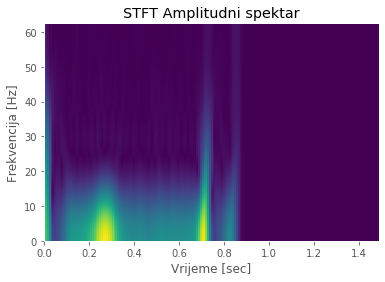

In [10]:
from scipy import signal

fs = 125

f, t, Zxx = signal.stft(mitbih_train.iloc[72600,:186], fs, nperseg=10, noverlap = 9, nfft = 2048)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0)
plt.title('STFT Amplitudni spektar')
plt.ylabel('Frekvencija [Hz]')
plt.xlabel('Vrijeme [sec]')
plt.show()

In [50]:
img = np.abs(Zxx)
print(img)

[[0.49817805 0.4292292  0.13958907 ... 0.         0.         0.        ]
 [0.4981771  0.42922742 0.13958682 ... 0.         0.         0.        ]
 [0.49817424 0.42922208 0.13958005 ... 0.         0.         0.        ]
 ...
 [0.07995211 0.00290463 0.00119412 ... 0.         0.         0.        ]
 [0.07994824 0.0028936  0.00119569 ... 0.         0.         0.        ]
 [0.07994695 0.00288991 0.00119621 ... 0.         0.         0.        ]]


In [51]:
import numpy as np

#data = np.zeros((mitbih_train.shape[0], mitbih_train[1] - 1))
data = mitbih_train.iloc[:, :186]
labels = mitbih_train.iloc[:, 187]
print(labels)

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: 187, Length: 87554, dtype: int32


In [52]:
from keras.utils import to_categorical

one_hot_labels = np.zeros((len(labels), 5))
one_hot_labels[:] = to_categorical(labels[:], num_classes = 5)

Using TensorFlow backend.


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, one_hot_labels, test_size=0.33, random_state=42)

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization,Dropout
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(50, input_dim=186, init='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, init='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer = Adam(lr = 100e-5), loss="categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1])

history = model.fit(X_train, y_train, validation_split = 0.2, epochs=15, shuffle=True, class_weight='auto')

C:\Users\damja\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, input_dim=186, activation="relu", kernel_initializer="normal")`
  import sys
C:\Users\damja\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(30, activation="relu", kernel_initializer="normal")`
  if __name__ == '__main__':


Train on 46928 samples, validate on 11733 samples
Epoch 1/15
46928/46928 [==============================] - 3s 62us/step - loss: 0.4094 - accuracy: 0.8914 - val_loss: 0.2691 - val_accuracy: 0.9267
Epoch 2/15
46928/46928 [==============================] - 2s 48us/step - loss: 0.2738 - accuracy: 0.9235 - val_loss: 0.2188 - val_accuracy: 0.9366
Epoch 3/15
46928/46928 [==============================] - 3s 54us/step - loss: 0.2364 - accuracy: 0.9348 - val_loss: 0.1811 - val_accuracy: 0.9501
Epoch 4/15
46928/46928 [==============================] - 2s 47us/step - loss: 0.2133 - accuracy: 0.9410 - val_loss: 0.1707 - val_accuracy: 0.9525
Epoch 5/15
46928/46928 [==============================] - 2s 51us/step - loss: 0.1983 - accuracy: 0.9453 - val_loss: 0.1552 - val_accuracy: 0.9582
Epoch 6/15
46928/46928 [==============================] - 2s 48us/step - loss: 0.1853 - accuracy: 0.9475 - val_loss: 0.1505 - val_accuracy: 0.9583
Epoch 7/15
46928/46928 [==============================] - 2s 48us/st

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                9350      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 11,035
Trainable params: 11,035
Non-trainable params: 0
_________________________________________________________________
None


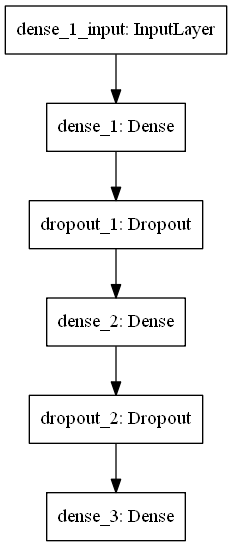

In [97]:
from keras.utils.vis_utils import plot_model

print(model.summary())

import keras

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

plot_model(model, to_file='dense_mitbih.png')

In [55]:
print(model.evaluate(X_test, y_test))

28893/28893 [==============================] - 0s 16us/step
[0.12256285693028822, 0.9664624929428101]


In [95]:
predictions = model.predict(X_train)
predictions = np.where(predictions < 0.5, 0, 1)

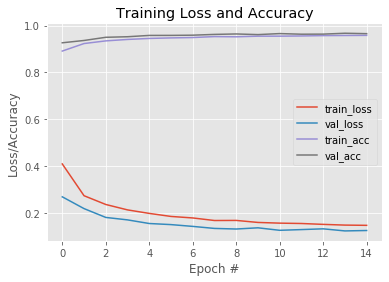

In [96]:
N = np.arange(0, 15)
title = "Training Loss and Accuracy"
 
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [98]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

accuracy = sklearn.metrics.accuracy_score(y_train, predictions)

print("Accuracy: {0:.2f}".format(100.0 * accuracy_score(y_train, predictions)))
print("Precision: {0:.2f}".format(100.0 * precision_score(y_train, predictions, average='micro')))
print("F1 score: {0:.2f}".format(100.0 * f1_score(y_train, predictions, average='micro')))

print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))


Accuracy: 96.64
Precision: 97.12
F1 score: 96.88
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     48505
           1       0.95      0.56      0.71      1526
           2       0.93      0.88      0.90      3894
           3       0.89      0.46      0.61       421
           4       1.00      0.92      0.96      4315

   micro avg       0.97      0.97      0.97     58661
   macro avg       0.95      0.76      0.83     58661
weighted avg       0.97      0.97      0.97     58661
 samples avg       0.97      0.97      0.97     58661



C:\Users\damja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:

prediction = model.predict(np.array([data.T[77549]]))
rectified_prediction = np.where(prediction < np.max(prediction), 0, 1)
print(rectified_prediction)

[[0 0 1 0 0]]


In [19]:
#print(ptbdb_abnormal.T[0][0:187])
prediction = model.predict(np.array([ptbdb_abnormal.T[100][0:186]]))
rectified_prediction = np.where(prediction < np.max(prediction), 0, 1)
print(rectified_prediction)

[[1 0 0 0 0]]


In [20]:
#print(ptbdb_normal)
#print(ptbdb_abnormal.T[0][0:187])
prediction = model.predict(np.array([ptbdb_normal.T[100][0:186]]))
rectified_prediction = np.where(prediction < np.max(prediction), 0, 1)
print(rectified_prediction)

[[1 0 0 0 0]]


In [21]:
ecg1 = pd.read_csv("./sensor_data_mitar/EKG_snimak1.csv", header=None)


In [22]:
print(ecg1)

   0      1      2      3      4      5      6      7      8      9      ...  \
0   2265   2286   2307   2336   2348   2369   2380   2380   2372   2366  ...   

   22109  22110  22111  22112  22113  22114  22115  22116  22117  22118  
0   2070   2065   2100   2133   2146   2144   2148   2168   2169     21  

[1 rows x 22119 columns]


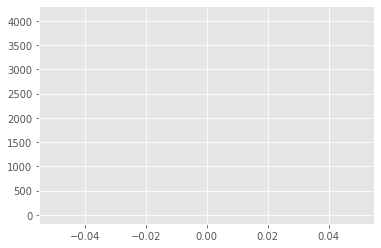

In [23]:
plt.plot(ecg1.iloc[0:100])
plt.show()

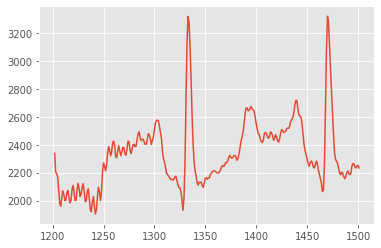

In [24]:
width = 300
a = 1202
plt.plot(ecg1.iloc[0,a:a + width])
plt.show()

In [25]:
ecg1_data = ecg1.iloc[0,750:5700]
print(ecg1_data)

750     2260
751     2278
752     2280
753     2296
754     2305
        ... 
5695    2570
5696    2550
5697    2530
5698    2511
5699    2474
Name: 0, Length: 4950, dtype: int64


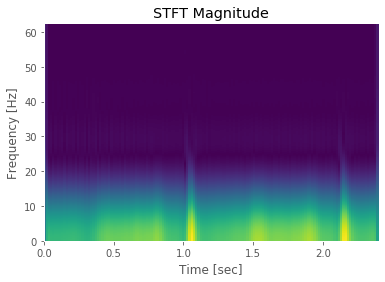

In [26]:
from scipy import signal

fs = 125

f, t, Zxx = signal.stft(ecg1.iloc[0,a:a + width], fs, nperseg=10, noverlap = 8, nfft = 2048)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

Postoji vise algoritama za detekciju QRS kompleksa EKG signala:
- Christov (CHRIS)
- Engelse and Zeelenberg (EZEE)
- P. Hamilton (HAM)
- H. Gamboa (GAMBOA)
- ECG Slope Sum Function (ESSF)

http://www.doiserbia.nb.rs/img/doi/0353-3670/2015/0353-36701504571J.pdf

(pogledati Template Matching)

In [18]:
ecg_beats = []

beat = []
for i in range(len(ecg1_data)):
    if ecg1_data[750 + i] > 2870:
        ecg_beats.append(beat.copy())
        beat.clear()
        beat.append(ecg1_data[750 + i])
    else:
        beat.append(ecg1_data[750 + i])

NameError: name 'ecg1_data' is not defined

In [19]:
import numpy as np

print(len(ecg_beats))
print(ecg_beats[29])

beat = np.array(ecg_beats[29].copy(), dtype='float')
print(beat[0])
beat -= np.min(beat)
beat /= np.max(beat)

#from scipy.signal import decimate
#decimated = decimate(beat, 2)

#single_beat[:len(decimated)] = decimated

#print(len(single_beat))
#print(single_beat)
#single_beat -= min(single_beat)
#single_beat /= max(single_beat)
#for beat in ecg_beats:
    #plt.figure()
plt.plot(beat)
plt.show()
plt.plot(mitbih_train.iloc[123,:186])
plt.show()

0


IndexError: list index out of range

In [20]:
prediction = model.predict(np.array([single_beat]))
rectified_prediction = np.where(prediction < np.max(prediction), 0, 1)
print(rectified_prediction)

NameError: name 'model' is not defined

In [21]:
from scipy.signal import decimate

new_signal = 

SyntaxError: invalid syntax (<ipython-input-21-aaf8e431f27f>, line 3)

In [22]:

plt.plot(ptbdb_normal.iloc[200,:186])
plt.show()

NameError: name 'ptbdb_normal' is not defined

In [31]:
print(ptbdb_abnormal)

            0         1         2         3         4         5         6    \
0      0.932233  0.869679  0.886186  0.929626  0.908775  0.933970  0.801043   
1      1.000000  0.606941  0.384181  0.254237  0.223567  0.276836  0.253430   
2      1.000000  0.951613  0.923963  0.853303  0.791859  0.734255  0.672043   
3      0.977819  0.899261  0.230129  0.032348  0.142329  0.223660  0.328096   
4      0.935618  0.801661  0.805815  1.000000  0.722741  0.480789  0.454829   
...         ...       ...       ...       ...       ...       ...       ...   
10501  0.981409  1.000000  0.559171  0.287093  0.196639  0.204862  0.215946   
10502  0.906250  0.922379  0.878024  0.810484  0.712702  0.667339  0.608871   
10503  1.000000  0.867971  0.674122  0.470332  0.296987  0.169307  0.077664   
10504  1.000000  0.984672  0.658888  0.556394  0.446809  0.395790  0.315260   
10505  0.997886  0.700317  0.464059  0.318182  0.233615  0.184989  0.124207   

            7         8         9    ...  178  179 

In [32]:
print(ptbdb_normal)

           0         1         2         3         4         5         6    \
0     1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1     1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2     0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3     1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4     1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   
...        ...       ...       ...       ...       ...       ...       ...   
4041  1.000000  0.929586  0.503550  0.293491  0.169822  0.159763  0.130769   
4042  1.000000  0.637579  0.154837  0.061983  0.088965  0.083374  0.065143   
4043  1.000000  0.872574  0.465071  0.232212  0.126132  0.155886  0.174644   
4044  0.915983  0.529373  0.288406  0.144536  0.171802  0.180669  0.177566   
4045  1.000000  0.838643  0.390567  0.191146  0.033513  0.055854  0.129086   

           7         8         9    ...  178  179  180  181  18

------------------------------

In [33]:
ekg1_n = pd.read_csv("./sensor_data_mitar/EKG_snimak1.csv", header=None).values[0]


In [34]:
print(ekg1_n.shape)
ekg1_n = ekg1_n[1000:]

(22119,)


In [35]:
print(ekg1_n.shape)

(21119,)


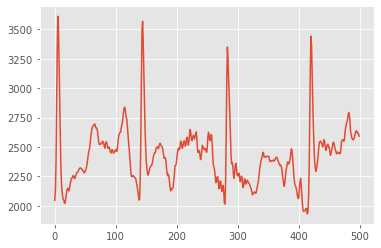

In [36]:
plt.figure()
plt.plot(ekg1_n[1000:1500])

In [37]:
import scipy.signal as sg

ekg1 = sg.decimate(ekg1_n, 2)
print(ekg1.shape)

(10560,)


In [38]:

hearthbeat_set = []

QRS_threshold = 3000#2800
NO_RESET = 15
DO_RESET = 15
DATASET_LENGTH = 185#186#744#374#
BUFFER_SIZE = 5

sampleCounter = 0
countDown = NO_RESET
countReset = DO_RESET
countBuffer = BUFFER_SIZE

state = 0
for i in range(len(ekg1)):
    sample = ekg1[i]
    if state == 0:
        hearthbeat = np.zeros(186, dtype='float')

        sampleCounter = 0
        countDown = NO_RESET
        countReset = DO_RESET
        countBuffer = BUFFER_SIZE

        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        if sample > QRS_threshold:
            state = 1


    if state == 1:
        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        countDown -= 1

        if countDown <= 0:
            state = 2


    if state == 2:
        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        countReset -= 1

        if countReset <= 0:
            state = 3

        if sample > QRS_threshold:
            state = 0


    if state == 3:
        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        if sample >= QRS_threshold:
                state = 4

        if sampleCounter > DATASET_LENGTH:
            hearthbeat -= np.partition(np.unique(hearthbeat), 2)[1]
            hearthbeat /= np.max(hearthbeat)
            hearthbeat = np.where(hearthbeat < 0, 0, hearthbeat)
            hearthbeat_set.append(hearthbeat.copy())
            state = 0


    if state == 4:
        hearthbeat[sampleCounter] = sample
        sampleCounter += 1

        countBuffer -= 1

        if sampleCounter > DATASET_LENGTH:
            #print("%f %d" % (np.partition(np.unique(hearthbeat), 2)[1], len(hearthbeat_set)))
            hearthbeat -= np.partition(np.unique(hearthbeat), 2)[1]
            hearthbeat /= np.max(hearthbeat)
            hearthbeat = np.where(hearthbeat < 0, 0, hearthbeat)
            
            hearthbeat_set.append(hearthbeat.copy())
            state = 0
            #print("It happened %d" % len(hearthbeat_set))
            
        if countBuffer <= 0:
            #print(len(hearthbeat_set))
            #print(np.partition(np.unique(hearthbeat), 2)[1])
            hearthbeat -= np.partition(np.unique(hearthbeat), 2)[1]
            hearthbeat /= np.max(hearthbeat)
            hearthbeat = np.where(hearthbeat < 0, 0, hearthbeat)
            
            hearthbeat_set.append(hearthbeat.copy())
            state = 0


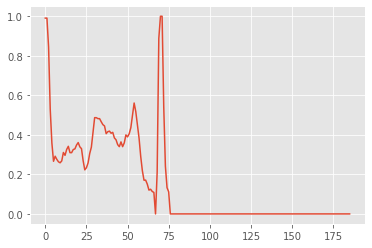

In [39]:
plt.plot(hearthbeat_set[2])

In [40]:
print(len(hearthbeat_set))
#for i in range(len(hearthbeat_set)):
#    hearthbeat_set[i] -= np.min(hearthbeat_set[i])
#    hearthbeat_set[i] /= np.max(hearthbeat_set[i])

68


In [41]:
#predikcija
prediction = model.predict(np.array([hearthbeat_set[5]]))
rectified_prediction = np.where(prediction < np.max(prediction), 0, 1)
print(rectified_prediction)

[[1 0 0 0 0]]


In [42]:
for i in range(len(hearthbeat_set)):
    prediction = model.predict(np.array([hearthbeat_set[i]]))
    rectified_prediction = np.where(prediction < np.max(prediction), 0, 1)
    
    decode = np.argmax(rectified_prediction, axis=1)[0]
    print(decode)

0
2
0
0
0
0
0
0
2
0
1
4
0
2
0
0
0
0
0
0
0
0
2
2
0
0
0
0
0
0
0
2
0
2
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2


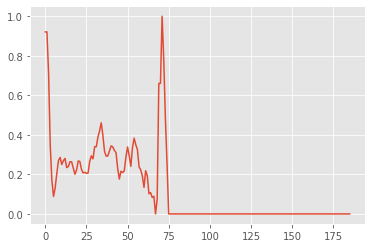

In [43]:
plt.plot(hearthbeat_set[5])

In [29]:
df_1=mitbih_train[mitbih_train[187]==1].sample(n=10,random_state=42).iloc[:, :186].values
df_2=mitbih_train[mitbih_train[187]==2].sample(n=10,random_state=42).iloc[:, :186].values
df_3=mitbih_train[mitbih_train[187]==3].sample(n=10,random_state=42).iloc[:, :186].values
df_4=mitbih_train[mitbih_train[187]==4].sample(n=10,random_state=42).iloc[:, :186].values
df_0=(mitbih_train[mitbih_train[187]==0]).sample(n=10,random_state=42).iloc[:, :186].values

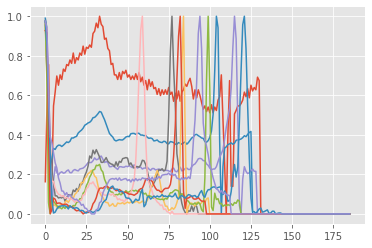

In [36]:
plt.figure()
for i in range(10):
    plt.plot(df_0[i])

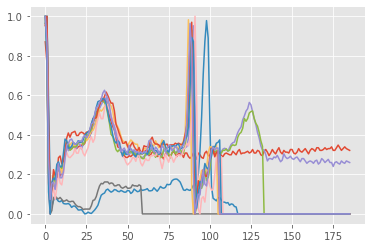

In [30]:
plt.figure()
for i in range(10):
    plt.plot(df_1[i])

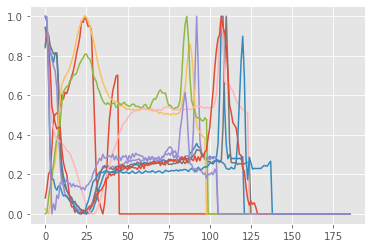

In [31]:
plt.figure()
for i in range(10):
    plt.plot(df_2[i])

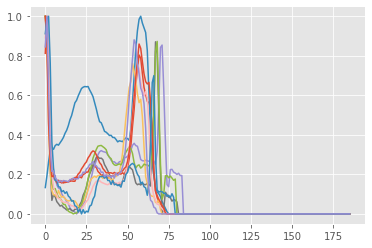

In [34]:
plt.figure()
for i in range(10):
    plt.plot(df_3[i])

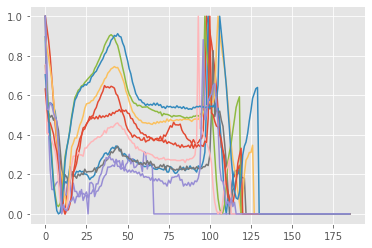

In [35]:
plt.figure()
for i in range(10):
    plt.plot(df_4[i])

------------------

## Treniranje CNNa nad STFTom signala

--------------------

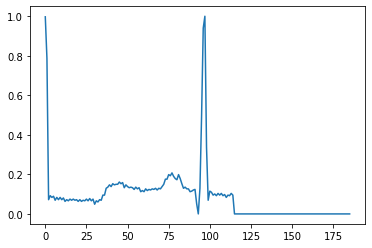

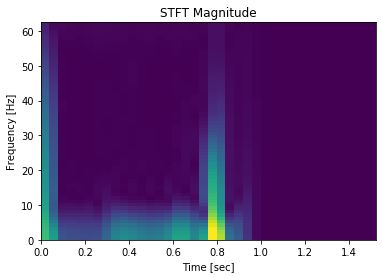

In [6]:
from scipy import signal

fs = 125

data_t = data.values

f = data_t[23]

plt.figure()
plt.plot(f)

f, t, Zxx = signal.stft(f, fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [124]:
print(Zxx.shape)

(65, 94)


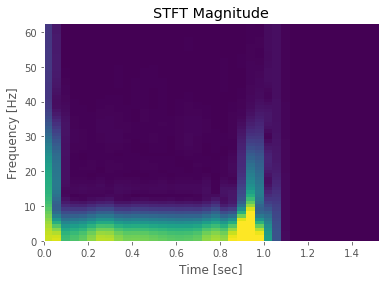

In [126]:
f, t, Zxx = signal.stft(df_0[2], fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

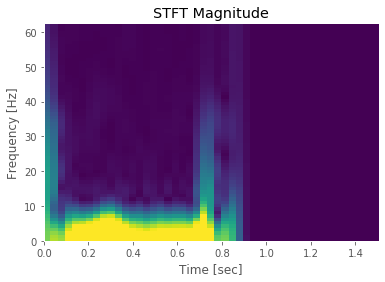

In [127]:
f, t, Zxx = signal.stft(df_1[2], fs, nperseg=20, noverlap = 16, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

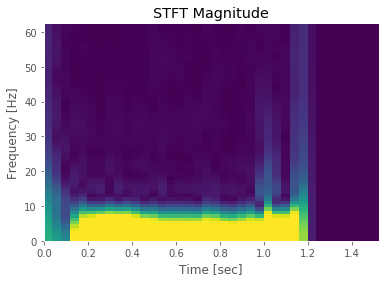

In [128]:
f, t, Zxx = signal.stft(df_2[2], fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

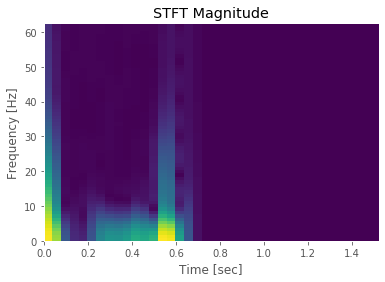

In [129]:
f, t, Zxx = signal.stft(df_3[2], fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

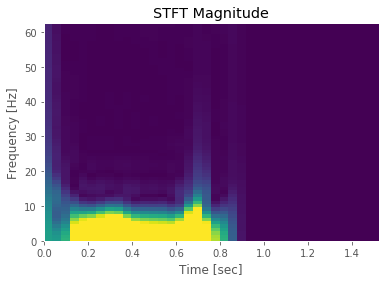

In [130]:
f, t, Zxx = signal.stft(df_4[20], fs, nperseg=20, noverlap = 15, nfft = 128)
plt.figure()
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.3)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [93]:
print(len(data))

87554


In [7]:
data_stft = []

for i in range(len(data)):
    f, t, aZxx = signal.stft(f, fs, nperseg=20, noverlap = 15, nfft = 128)
    data_stft.append(np.abs(aZxx))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093


3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859


5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582


7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240


8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912


10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
1054

11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
1191

13451
13452
13453
13454
13455
13456
13457
13458
13459
13460
13461
13462
13463
13464
13465
13466
13467
13468
13469
13470
13471
13472
13473
13474
13475
13476
13477
13478
13479
13480
13481
13482
13483
13484
13485
13486
13487
13488
13489
13490
13491
13492
13493
13494
13495
13496
13497
13498
13499
13500
13501
13502
13503
13504
13505
13506
13507
13508
13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
1361

14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14910
14911
14912
14913
14914
14915
14916
14917
14918
14919
14920
14921
14922
14923
14924
14925
14926
14927
14928
14929
14930
14931
14932
14933
14934
14935
14936
14937
14938
14939
14940
14941
14942
14943
14944
14945
14946
14947
14948
14949
14950
14951
14952
14953
14954
14955
14956
14957
14958
14959
14960
14961
14962
14963
14964
14965
14966
14967
14968
14969
14970
14971
14972
14973
14974
14975
14976
14977
14978
14979
14980
14981
14982
14983
14984
14985
14986
14987
14988
14989
14990
14991
14992
14993
14994
14995
14996
14997
14998
14999
15000
15001
15002
15003
15004
15005
15006
15007
15008
15009
15010
15011
15012
15013
15014
15015
15016
15017
15018
15019
15020
15021
1502

16573
16574
16575
16576
16577
16578
16579
16580
16581
16582
16583
16584
16585
16586
16587
16588
16589
16590
16591
16592
16593
16594
16595
16596
16597
16598
16599
16600
16601
16602
16603
16604
16605
16606
16607
16608
16609
16610
16611
16612
16613
16614
16615
16616
16617
16618
16619
16620
16621
16622
16623
16624
16625
16626
16627
16628
16629
16630
16631
16632
16633
16634
16635
16636
16637
16638
16639
16640
16641
16642
16643
16644
16645
16646
16647
16648
16649
16650
16651
16652
16653
16654
16655
16656
16657
16658
16659
16660
16661
16662
16663
16664
16665
16666
16667
16668
16669
16670
16671
16672
16673
16674
16675
16676
16677
16678
16679
16680
16681
16682
16683
16684
16685
16686
16687
16688
16689
16690
16691
16692
16693
16694
16695
16696
16697
16698
16699
16700
16701
16702
16703
16704
16705
16706
16707
16708
16709
16710
16711
16712
16713
16714
16715
16716
16717
16718
16719
16720
16721
16722
16723
16724
16725
16726
16727
16728
16729
16730
16731
16732
16733
16734
16735
16736
16737
16738
1673

17974
17975
17976
17977
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18071
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18082
18083
18084
18085
18086
18087
18088
18089
18090
18091
18092
18093
18094
18095
18096
18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
18119
18120
18121
18122
18123
18124
18125
18126
18127
18128
18129
18130
18131
18132
18133
18134
18135
18136
18137
18138
18139
1814

19378
19379
19380
19381
19382
19383
19384
19385
19386
19387
19388
19389
19390
19391
19392
19393
19394
19395
19396
19397
19398
19399
19400
19401
19402
19403
19404
19405
19406
19407
19408
19409
19410
19411
19412
19413
19414
19415
19416
19417
19418
19419
19420
19421
19422
19423
19424
19425
19426
19427
19428
19429
19430
19431
19432
19433
19434
19435
19436
19437
19438
19439
19440
19441
19442
19443
19444
19445
19446
19447
19448
19449
19450
19451
19452
19453
19454
19455
19456
19457
19458
19459
19460
19461
19462
19463
19464
19465
19466
19467
19468
19469
19470
19471
19472
19473
19474
19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19488
19489
19490
19491
19492
19493
19494
19495
19496
19497
19498
19499
19500
19501
19502
19503
19504
19505
19506
19507
19508
19509
19510
19511
19512
19513
19514
19515
19516
19517
19518
19519
19520
19521
19522
19523
19524
19525
19526
19527
19528
19529
19530
19531
19532
19533
19534
19535
19536
19537
19538
19539
19540
19541
19542
19543
1954

20762
20763
20764
20765
20766
20767
20768
20769
20770
20771
20772
20773
20774
20775
20776
20777
20778
20779
20780
20781
20782
20783
20784
20785
20786
20787
20788
20789
20790
20791
20792
20793
20794
20795
20796
20797
20798
20799
20800
20801
20802
20803
20804
20805
20806
20807
20808
20809
20810
20811
20812
20813
20814
20815
20816
20817
20818
20819
20820
20821
20822
20823
20824
20825
20826
20827
20828
20829
20830
20831
20832
20833
20834
20835
20836
20837
20838
20839
20840
20841
20842
20843
20844
20845
20846
20847
20848
20849
20850
20851
20852
20853
20854
20855
20856
20857
20858
20859
20860
20861
20862
20863
20864
20865
20866
20867
20868
20869
20870
20871
20872
20873
20874
20875
20876
20877
20878
20879
20880
20881
20882
20883
20884
20885
20886
20887
20888
20889
20890
20891
20892
20893
20894
20895
20896
20897
20898
20899
20900
20901
20902
20903
20904
20905
20906
20907
20908
20909
20910
20911
20912
20913
20914
20915
20916
20917
20918
20919
20920
20921
20922
20923
20924
20925
20926
20927
2092

22167
22168
22169
22170
22171
22172
22173
22174
22175
22176
22177
22178
22179
22180
22181
22182
22183
22184
22185
22186
22187
22188
22189
22190
22191
22192
22193
22194
22195
22196
22197
22198
22199
22200
22201
22202
22203
22204
22205
22206
22207
22208
22209
22210
22211
22212
22213
22214
22215
22216
22217
22218
22219
22220
22221
22222
22223
22224
22225
22226
22227
22228
22229
22230
22231
22232
22233
22234
22235
22236
22237
22238
22239
22240
22241
22242
22243
22244
22245
22246
22247
22248
22249
22250
22251
22252
22253
22254
22255
22256
22257
22258
22259
22260
22261
22262
22263
22264
22265
22266
22267
22268
22269
22270
22271
22272
22273
22274
22275
22276
22277
22278
22279
22280
22281
22282
22283
22284
22285
22286
22287
22288
22289
22290
22291
22292
22293
22294
22295
22296
22297
22298
22299
22300
22301
22302
22303
22304
22305
22306
22307
22308
22309
22310
22311
22312
22313
22314
22315
22316
22317
22318
22319
22320
22321
22322
22323
22324
22325
22326
22327
22328
22329
22330
22331
22332
2233

23580
23581
23582
23583
23584
23585
23586
23587
23588
23589
23590
23591
23592
23593
23594
23595
23596
23597
23598
23599
23600
23601
23602
23603
23604
23605
23606
23607
23608
23609
23610
23611
23612
23613
23614
23615
23616
23617
23618
23619
23620
23621
23622
23623
23624
23625
23626
23627
23628
23629
23630
23631
23632
23633
23634
23635
23636
23637
23638
23639
23640
23641
23642
23643
23644
23645
23646
23647
23648
23649
23650
23651
23652
23653
23654
23655
23656
23657
23658
23659
23660
23661
23662
23663
23664
23665
23666
23667
23668
23669
23670
23671
23672
23673
23674
23675
23676
23677
23678
23679
23680
23681
23682
23683
23684
23685
23686
23687
23688
23689
23690
23691
23692
23693
23694
23695
23696
23697
23698
23699
23700
23701
23702
23703
23704
23705
23706
23707
23708
23709
23710
23711
23712
23713
23714
23715
23716
23717
23718
23719
23720
23721
23722
23723
23724
23725
23726
23727
23728
23729
23730
23731
23732
23733
23734
23735
23736
23737
23738
23739
23740
23741
23742
23743
23744
23745
2374

24989
24990
24991
24992
24993
24994
24995
24996
24997
24998
24999
25000
25001
25002
25003
25004
25005
25006
25007
25008
25009
25010
25011
25012
25013
25014
25015
25016
25017
25018
25019
25020
25021
25022
25023
25024
25025
25026
25027
25028
25029
25030
25031
25032
25033
25034
25035
25036
25037
25038
25039
25040
25041
25042
25043
25044
25045
25046
25047
25048
25049
25050
25051
25052
25053
25054
25055
25056
25057
25058
25059
25060
25061
25062
25063
25064
25065
25066
25067
25068
25069
25070
25071
25072
25073
25074
25075
25076
25077
25078
25079
25080
25081
25082
25083
25084
25085
25086
25087
25088
25089
25090
25091
25092
25093
25094
25095
25096
25097
25098
25099
25100
25101
25102
25103
25104
25105
25106
25107
25108
25109
25110
25111
25112
25113
25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
2515

26413
26414
26415
26416
26417
26418
26419
26420
26421
26422
26423
26424
26425
26426
26427
26428
26429
26430
26431
26432
26433
26434
26435
26436
26437
26438
26439
26440
26441
26442
26443
26444
26445
26446
26447
26448
26449
26450
26451
26452
26453
26454
26455
26456
26457
26458
26459
26460
26461
26462
26463
26464
26465
26466
26467
26468
26469
26470
26471
26472
26473
26474
26475
26476
26477
26478
26479
26480
26481
26482
26483
26484
26485
26486
26487
26488
26489
26490
26491
26492
26493
26494
26495
26496
26497
26498
26499
26500
26501
26502
26503
26504
26505
26506
26507
26508
26509
26510
26511
26512
26513
26514
26515
26516
26517
26518
26519
26520
26521
26522
26523
26524
26525
26526
26527
26528
26529
26530
26531
26532
26533
26534
26535
26536
26537
26538
26539
26540
26541
26542
26543
26544
26545
26546
26547
26548
26549
26550
26551
26552
26553
26554
26555
26556
26557
26558
26559
26560
26561
26562
26563
26564
26565
26566
26567
26568
26569
26570
26571
26572
26573
26574
26575
26576
26577
26578
2657

27832
27833
27834
27835
27836
27837
27838
27839
27840
27841
27842
27843
27844
27845
27846
27847
27848
27849
27850
27851
27852
27853
27854
27855
27856
27857
27858
27859
27860
27861
27862
27863
27864
27865
27866
27867
27868
27869
27870
27871
27872
27873
27874
27875
27876
27877
27878
27879
27880
27881
27882
27883
27884
27885
27886
27887
27888
27889
27890
27891
27892
27893
27894
27895
27896
27897
27898
27899
27900
27901
27902
27903
27904
27905
27906
27907
27908
27909
27910
27911
27912
27913
27914
27915
27916
27917
27918
27919
27920
27921
27922
27923
27924
27925
27926
27927
27928
27929
27930
27931
27932
27933
27934
27935
27936
27937
27938
27939
27940
27941
27942
27943
27944
27945
27946
27947
27948
27949
27950
27951
27952
27953
27954
27955
27956
27957
27958
27959
27960
27961
27962
27963
27964
27965
27966
27967
27968
27969
27970
27971
27972
27973
27974
27975
27976
27977
27978
27979
27980
27981
27982
27983
27984
27985
27986
27987
27988
27989
27990
27991
27992
27993
27994
27995
27996
27997
2799

29237
29238
29239
29240
29241
29242
29243
29244
29245
29246
29247
29248
29249
29250
29251
29252
29253
29254
29255
29256
29257
29258
29259
29260
29261
29262
29263
29264
29265
29266
29267
29268
29269
29270
29271
29272
29273
29274
29275
29276
29277
29278
29279
29280
29281
29282
29283
29284
29285
29286
29287
29288
29289
29290
29291
29292
29293
29294
29295
29296
29297
29298
29299
29300
29301
29302
29303
29304
29305
29306
29307
29308
29309
29310
29311
29312
29313
29314
29315
29316
29317
29318
29319
29320
29321
29322
29323
29324
29325
29326
29327
29328
29329
29330
29331
29332
29333
29334
29335
29336
29337
29338
29339
29340
29341
29342
29343
29344
29345
29346
29347
29348
29349
29350
29351
29352
29353
29354
29355
29356
29357
29358
29359
29360
29361
29362
29363
29364
29365
29366
29367
29368
29369
29370
29371
29372
29373
29374
29375
29376
29377
29378
29379
29380
29381
29382
29383
29384
29385
29386
29387
29388
29389
29390
29391
29392
29393
29394
29395
29396
29397
29398
29399
29400
29401
29402
2940

30948
30949
30950
30951
30952
30953
30954
30955
30956
30957
30958
30959
30960
30961
30962
30963
30964
30965
30966
30967
30968
30969
30970
30971
30972
30973
30974
30975
30976
30977
30978
30979
30980
30981
30982
30983
30984
30985
30986
30987
30988
30989
30990
30991
30992
30993
30994
30995
30996
30997
30998
30999
31000
31001
31002
31003
31004
31005
31006
31007
31008
31009
31010
31011
31012
31013
31014
31015
31016
31017
31018
31019
31020
31021
31022
31023
31024
31025
31026
31027
31028
31029
31030
31031
31032
31033
31034
31035
31036
31037
31038
31039
31040
31041
31042
31043
31044
31045
31046
31047
31048
31049
31050
31051
31052
31053
31054
31055
31056
31057
31058
31059
31060
31061
31062
31063
31064
31065
31066
31067
31068
31069
31070
31071
31072
31073
31074
31075
31076
31077
31078
31079
31080
31081
31082
31083
31084
31085
31086
31087
31088
31089
31090
31091
31092
31093
31094
31095
31096
31097
31098
31099
31100
31101
31102
31103
31104
31105
31106
31107
31108
31109
31110
31111
31112
31113
3111

32350
32351
32352
32353
32354
32355
32356
32357
32358
32359
32360
32361
32362
32363
32364
32365
32366
32367
32368
32369
32370
32371
32372
32373
32374
32375
32376
32377
32378
32379
32380
32381
32382
32383
32384
32385
32386
32387
32388
32389
32390
32391
32392
32393
32394
32395
32396
32397
32398
32399
32400
32401
32402
32403
32404
32405
32406
32407
32408
32409
32410
32411
32412
32413
32414
32415
32416
32417
32418
32419
32420
32421
32422
32423
32424
32425
32426
32427
32428
32429
32430
32431
32432
32433
32434
32435
32436
32437
32438
32439
32440
32441
32442
32443
32444
32445
32446
32447
32448
32449
32450
32451
32452
32453
32454
32455
32456
32457
32458
32459
32460
32461
32462
32463
32464
32465
32466
32467
32468
32469
32470
32471
32472
32473
32474
32475
32476
32477
32478
32479
32480
32481
32482
32483
32484
32485
32486
32487
32488
32489
32490
32491
32492
32493
32494
32495
32496
32497
32498
32499
32500
32501
32502
32503
32504
32505
32506
32507
32508
32509
32510
32511
32512
32513
32514
32515
3251

33762
33763
33764
33765
33766
33767
33768
33769
33770
33771
33772
33773
33774
33775
33776
33777
33778
33779
33780
33781
33782
33783
33784
33785
33786
33787
33788
33789
33790
33791
33792
33793
33794
33795
33796
33797
33798
33799
33800
33801
33802
33803
33804
33805
33806
33807
33808
33809
33810
33811
33812
33813
33814
33815
33816
33817
33818
33819
33820
33821
33822
33823
33824
33825
33826
33827
33828
33829
33830
33831
33832
33833
33834
33835
33836
33837
33838
33839
33840
33841
33842
33843
33844
33845
33846
33847
33848
33849
33850
33851
33852
33853
33854
33855
33856
33857
33858
33859
33860
33861
33862
33863
33864
33865
33866
33867
33868
33869
33870
33871
33872
33873
33874
33875
33876
33877
33878
33879
33880
33881
33882
33883
33884
33885
33886
33887
33888
33889
33890
33891
33892
33893
33894
33895
33896
33897
33898
33899
33900
33901
33902
33903
33904
33905
33906
33907
33908
33909
33910
33911
33912
33913
33914
33915
33916
33917
33918
33919
33920
33921
33922
33923
33924
33925
33926
33927
3392

35177
35178
35179
35180
35181
35182
35183
35184
35185
35186
35187
35188
35189
35190
35191
35192
35193
35194
35195
35196
35197
35198
35199
35200
35201
35202
35203
35204
35205
35206
35207
35208
35209
35210
35211
35212
35213
35214
35215
35216
35217
35218
35219
35220
35221
35222
35223
35224
35225
35226
35227
35228
35229
35230
35231
35232
35233
35234
35235
35236
35237
35238
35239
35240
35241
35242
35243
35244
35245
35246
35247
35248
35249
35250
35251
35252
35253
35254
35255
35256
35257
35258
35259
35260
35261
35262
35263
35264
35265
35266
35267
35268
35269
35270
35271
35272
35273
35274
35275
35276
35277
35278
35279
35280
35281
35282
35283
35284
35285
35286
35287
35288
35289
35290
35291
35292
35293
35294
35295
35296
35297
35298
35299
35300
35301
35302
35303
35304
35305
35306
35307
35308
35309
35310
35311
35312
35313
35314
35315
35316
35317
35318
35319
35320
35321
35322
35323
35324
35325
35326
35327
35328
35329
35330
35331
35332
35333
35334
35335
35336
35337
35338
35339
35340
35341
35342
3534

36588
36589
36590
36591
36592
36593
36594
36595
36596
36597
36598
36599
36600
36601
36602
36603
36604
36605
36606
36607
36608
36609
36610
36611
36612
36613
36614
36615
36616
36617
36618
36619
36620
36621
36622
36623
36624
36625
36626
36627
36628
36629
36630
36631
36632
36633
36634
36635
36636
36637
36638
36639
36640
36641
36642
36643
36644
36645
36646
36647
36648
36649
36650
36651
36652
36653
36654
36655
36656
36657
36658
36659
36660
36661
36662
36663
36664
36665
36666
36667
36668
36669
36670
36671
36672
36673
36674
36675
36676
36677
36678
36679
36680
36681
36682
36683
36684
36685
36686
36687
36688
36689
36690
36691
36692
36693
36694
36695
36696
36697
36698
36699
36700
36701
36702
36703
36704
36705
36706
36707
36708
36709
36710
36711
36712
36713
36714
36715
36716
36717
36718
36719
36720
36721
36722
36723
36724
36725
36726
36727
36728
36729
36730
36731
36732
36733
36734
36735
36736
36737
36738
36739
36740
36741
36742
36743
36744
36745
36746
36747
36748
36749
36750
36751
36752
36753
3675

37989
37990
37991
37992
37993
37994
37995
37996
37997
37998
37999
38000
38001
38002
38003
38004
38005
38006
38007
38008
38009
38010
38011
38012
38013
38014
38015
38016
38017
38018
38019
38020
38021
38022
38023
38024
38025
38026
38027
38028
38029
38030
38031
38032
38033
38034
38035
38036
38037
38038
38039
38040
38041
38042
38043
38044
38045
38046
38047
38048
38049
38050
38051
38052
38053
38054
38055
38056
38057
38058
38059
38060
38061
38062
38063
38064
38065
38066
38067
38068
38069
38070
38071
38072
38073
38074
38075
38076
38077
38078
38079
38080
38081
38082
38083
38084
38085
38086
38087
38088
38089
38090
38091
38092
38093
38094
38095
38096
38097
38098
38099
38100
38101
38102
38103
38104
38105
38106
38107
38108
38109
38110
38111
38112
38113
38114
38115
38116
38117
38118
38119
38120
38121
38122
38123
38124
38125
38126
38127
38128
38129
38130
38131
38132
38133
38134
38135
38136
38137
38138
38139
38140
38141
38142
38143
38144
38145
38146
38147
38148
38149
38150
38151
38152
38153
38154
3815

39383
39384
39385
39386
39387
39388
39389
39390
39391
39392
39393
39394
39395
39396
39397
39398
39399
39400
39401
39402
39403
39404
39405
39406
39407
39408
39409
39410
39411
39412
39413
39414
39415
39416
39417
39418
39419
39420
39421
39422
39423
39424
39425
39426
39427
39428
39429
39430
39431
39432
39433
39434
39435
39436
39437
39438
39439
39440
39441
39442
39443
39444
39445
39446
39447
39448
39449
39450
39451
39452
39453
39454
39455
39456
39457
39458
39459
39460
39461
39462
39463
39464
39465
39466
39467
39468
39469
39470
39471
39472
39473
39474
39475
39476
39477
39478
39479
39480
39481
39482
39483
39484
39485
39486
39487
39488
39489
39490
39491
39492
39493
39494
39495
39496
39497
39498
39499
39500
39501
39502
39503
39504
39505
39506
39507
39508
39509
39510
39511
39512
39513
39514
39515
39516
39517
39518
39519
39520
39521
39522
39523
39524
39525
39526
39527
39528
39529
39530
39531
39532
39533
39534
39535
39536
39537
39538
39539
39540
39541
39542
39543
39544
39545
39546
39547
39548
3954

41064
41065
41066
41067
41068
41069
41070
41071
41072
41073
41074
41075
41076
41077
41078
41079
41080
41081
41082
41083
41084
41085
41086
41087
41088
41089
41090
41091
41092
41093
41094
41095
41096
41097
41098
41099
41100
41101
41102
41103
41104
41105
41106
41107
41108
41109
41110
41111
41112
41113
41114
41115
41116
41117
41118
41119
41120
41121
41122
41123
41124
41125
41126
41127
41128
41129
41130
41131
41132
41133
41134
41135
41136
41137
41138
41139
41140
41141
41142
41143
41144
41145
41146
41147
41148
41149
41150
41151
41152
41153
41154
41155
41156
41157
41158
41159
41160
41161
41162
41163
41164
41165
41166
41167
41168
41169
41170
41171
41172
41173
41174
41175
41176
41177
41178
41179
41180
41181
41182
41183
41184
41185
41186
41187
41188
41189
41190
41191
41192
41193
41194
41195
41196
41197
41198
41199
41200
41201
41202
41203
41204
41205
41206
41207
41208
41209
41210
41211
41212
41213
41214
41215
41216
41217
41218
41219
41220
41221
41222
41223
41224
41225
41226
41227
41228
41229
4123

42786
42787
42788
42789
42790
42791
42792
42793
42794
42795
42796
42797
42798
42799
42800
42801
42802
42803
42804
42805
42806
42807
42808
42809
42810
42811
42812
42813
42814
42815
42816
42817
42818
42819
42820
42821
42822
42823
42824
42825
42826
42827
42828
42829
42830
42831
42832
42833
42834
42835
42836
42837
42838
42839
42840
42841
42842
42843
42844
42845
42846
42847
42848
42849
42850
42851
42852
42853
42854
42855
42856
42857
42858
42859
42860
42861
42862
42863
42864
42865
42866
42867
42868
42869
42870
42871
42872
42873
42874
42875
42876
42877
42878
42879
42880
42881
42882
42883
42884
42885
42886
42887
42888
42889
42890
42891
42892
42893
42894
42895
42896
42897
42898
42899
42900
42901
42902
42903
42904
42905
42906
42907
42908
42909
42910
42911
42912
42913
42914
42915
42916
42917
42918
42919
42920
42921
42922
42923
42924
42925
42926
42927
42928
42929
42930
42931
42932
42933
42934
42935
42936
42937
42938
42939
42940
42941
42942
42943
42944
42945
42946
42947
42948
42949
42950
42951
4295

44192
44193
44194
44195
44196
44197
44198
44199
44200
44201
44202
44203
44204
44205
44206
44207
44208
44209
44210
44211
44212
44213
44214
44215
44216
44217
44218
44219
44220
44221
44222
44223
44224
44225
44226
44227
44228
44229
44230
44231
44232
44233
44234
44235
44236
44237
44238
44239
44240
44241
44242
44243
44244
44245
44246
44247
44248
44249
44250
44251
44252
44253
44254
44255
44256
44257
44258
44259
44260
44261
44262
44263
44264
44265
44266
44267
44268
44269
44270
44271
44272
44273
44274
44275
44276
44277
44278
44279
44280
44281
44282
44283
44284
44285
44286
44287
44288
44289
44290
44291
44292
44293
44294
44295
44296
44297
44298
44299
44300
44301
44302
44303
44304
44305
44306
44307
44308
44309
44310
44311
44312
44313
44314
44315
44316
44317
44318
44319
44320
44321
44322
44323
44324
44325
44326
44327
44328
44329
44330
44331
44332
44333
44334
44335
44336
44337
44338
44339
44340
44341
44342
44343
44344
44345
44346
44347
44348
44349
44350
44351
44352
44353
44354
44355
44356
44357
4435

45579
45580
45581
45582
45583
45584
45585
45586
45587
45588
45589
45590
45591
45592
45593
45594
45595
45596
45597
45598
45599
45600
45601
45602
45603
45604
45605
45606
45607
45608
45609
45610
45611
45612
45613
45614
45615
45616
45617
45618
45619
45620
45621
45622
45623
45624
45625
45626
45627
45628
45629
45630
45631
45632
45633
45634
45635
45636
45637
45638
45639
45640
45641
45642
45643
45644
45645
45646
45647
45648
45649
45650
45651
45652
45653
45654
45655
45656
45657
45658
45659
45660
45661
45662
45663
45664
45665
45666
45667
45668
45669
45670
45671
45672
45673
45674
45675
45676
45677
45678
45679
45680
45681
45682
45683
45684
45685
45686
45687
45688
45689
45690
45691
45692
45693
45694
45695
45696
45697
45698
45699
45700
45701
45702
45703
45704
45705
45706
45707
45708
45709
45710
45711
45712
45713
45714
45715
45716
45717
45718
45719
45720
45721
45722
45723
45724
45725
45726
45727
45728
45729
45730
45731
45732
45733
45734
45735
45736
45737
45738
45739
45740
45741
45742
45743
45744
4574

46980
46981
46982
46983
46984
46985
46986
46987
46988
46989
46990
46991
46992
46993
46994
46995
46996
46997
46998
46999
47000
47001
47002
47003
47004
47005
47006
47007
47008
47009
47010
47011
47012
47013
47014
47015
47016
47017
47018
47019
47020
47021
47022
47023
47024
47025
47026
47027
47028
47029
47030
47031
47032
47033
47034
47035
47036
47037
47038
47039
47040
47041
47042
47043
47044
47045
47046
47047
47048
47049
47050
47051
47052
47053
47054
47055
47056
47057
47058
47059
47060
47061
47062
47063
47064
47065
47066
47067
47068
47069
47070
47071
47072
47073
47074
47075
47076
47077
47078
47079
47080
47081
47082
47083
47084
47085
47086
47087
47088
47089
47090
47091
47092
47093
47094
47095
47096
47097
47098
47099
47100
47101
47102
47103
47104
47105
47106
47107
47108
47109
47110
47111
47112
47113
47114
47115
47116
47117
47118
47119
47120
47121
47122
47123
47124
47125
47126
47127
47128
47129
47130
47131
47132
47133
47134
47135
47136
47137
47138
47139
47140
47141
47142
47143
47144
47145
4714

48374
48375
48376
48377
48378
48379
48380
48381
48382
48383
48384
48385
48386
48387
48388
48389
48390
48391
48392
48393
48394
48395
48396
48397
48398
48399
48400
48401
48402
48403
48404
48405
48406
48407
48408
48409
48410
48411
48412
48413
48414
48415
48416
48417
48418
48419
48420
48421
48422
48423
48424
48425
48426
48427
48428
48429
48430
48431
48432
48433
48434
48435
48436
48437
48438
48439
48440
48441
48442
48443
48444
48445
48446
48447
48448
48449
48450
48451
48452
48453
48454
48455
48456
48457
48458
48459
48460
48461
48462
48463
48464
48465
48466
48467
48468
48469
48470
48471
48472
48473
48474
48475
48476
48477
48478
48479
48480
48481
48482
48483
48484
48485
48486
48487
48488
48489
48490
48491
48492
48493
48494
48495
48496
48497
48498
48499
48500
48501
48502
48503
48504
48505
48506
48507
48508
48509
48510
48511
48512
48513
48514
48515
48516
48517
48518
48519
48520
48521
48522
48523
48524
48525
48526
48527
48528
48529
48530
48531
48532
48533
48534
48535
48536
48537
48538
48539
4854

49759
49760
49761
49762
49763
49764
49765
49766
49767
49768
49769
49770
49771
49772
49773
49774
49775
49776
49777
49778
49779
49780
49781
49782
49783
49784
49785
49786
49787
49788
49789
49790
49791
49792
49793
49794
49795
49796
49797
49798
49799
49800
49801
49802
49803
49804
49805
49806
49807
49808
49809
49810
49811
49812
49813
49814
49815
49816
49817
49818
49819
49820
49821
49822
49823
49824
49825
49826
49827
49828
49829
49830
49831
49832
49833
49834
49835
49836
49837
49838
49839
49840
49841
49842
49843
49844
49845
49846
49847
49848
49849
49850
49851
49852
49853
49854
49855
49856
49857
49858
49859
49860
49861
49862
49863
49864
49865
49866
49867
49868
49869
49870
49871
49872
49873
49874
49875
49876
49877
49878
49879
49880
49881
49882
49883
49884
49885
49886
49887
49888
49889
49890
49891
49892
49893
49894
49895
49896
49897
49898
49899
49900
49901
49902
49903
49904
49905
49906
49907
49908
49909
49910
49911
49912
49913
49914
49915
49916
49917
49918
49919
49920
49921
49922
49923
49924
4992

51156
51157
51158
51159
51160
51161
51162
51163
51164
51165
51166
51167
51168
51169
51170
51171
51172
51173
51174
51175
51176
51177
51178
51179
51180
51181
51182
51183
51184
51185
51186
51187
51188
51189
51190
51191
51192
51193
51194
51195
51196
51197
51198
51199
51200
51201
51202
51203
51204
51205
51206
51207
51208
51209
51210
51211
51212
51213
51214
51215
51216
51217
51218
51219
51220
51221
51222
51223
51224
51225
51226
51227
51228
51229
51230
51231
51232
51233
51234
51235
51236
51237
51238
51239
51240
51241
51242
51243
51244
51245
51246
51247
51248
51249
51250
51251
51252
51253
51254
51255
51256
51257
51258
51259
51260
51261
51262
51263
51264
51265
51266
51267
51268
51269
51270
51271
51272
51273
51274
51275
51276
51277
51278
51279
51280
51281
51282
51283
51284
51285
51286
51287
51288
51289
51290
51291
51292
51293
51294
51295
51296
51297
51298
51299
51300
51301
51302
51303
51304
51305
51306
51307
51308
51309
51310
51311
51312
51313
51314
51315
51316
51317
51318
51319
51320
51321
5132

52557
52558
52559
52560
52561
52562
52563
52564
52565
52566
52567
52568
52569
52570
52571
52572
52573
52574
52575
52576
52577
52578
52579
52580
52581
52582
52583
52584
52585
52586
52587
52588
52589
52590
52591
52592
52593
52594
52595
52596
52597
52598
52599
52600
52601
52602
52603
52604
52605
52606
52607
52608
52609
52610
52611
52612
52613
52614
52615
52616
52617
52618
52619
52620
52621
52622
52623
52624
52625
52626
52627
52628
52629
52630
52631
52632
52633
52634
52635
52636
52637
52638
52639
52640
52641
52642
52643
52644
52645
52646
52647
52648
52649
52650
52651
52652
52653
52654
52655
52656
52657
52658
52659
52660
52661
52662
52663
52664
52665
52666
52667
52668
52669
52670
52671
52672
52673
52674
52675
52676
52677
52678
52679
52680
52681
52682
52683
52684
52685
52686
52687
52688
52689
52690
52691
52692
52693
52694
52695
52696
52697
52698
52699
52700
52701
52702
52703
52704
52705
52706
52707
52708
52709
52710
52711
52712
52713
52714
52715
52716
52717
52718
52719
52720
52721
52722
5272

54260
54261
54262
54263
54264
54265
54266
54267
54268
54269
54270
54271
54272
54273
54274
54275
54276
54277
54278
54279
54280
54281
54282
54283
54284
54285
54286
54287
54288
54289
54290
54291
54292
54293
54294
54295
54296
54297
54298
54299
54300
54301
54302
54303
54304
54305
54306
54307
54308
54309
54310
54311
54312
54313
54314
54315
54316
54317
54318
54319
54320
54321
54322
54323
54324
54325
54326
54327
54328
54329
54330
54331
54332
54333
54334
54335
54336
54337
54338
54339
54340
54341
54342
54343
54344
54345
54346
54347
54348
54349
54350
54351
54352
54353
54354
54355
54356
54357
54358
54359
54360
54361
54362
54363
54364
54365
54366
54367
54368
54369
54370
54371
54372
54373
54374
54375
54376
54377
54378
54379
54380
54381
54382
54383
54384
54385
54386
54387
54388
54389
54390
54391
54392
54393
54394
54395
54396
54397
54398
54399
54400
54401
54402
54403
54404
54405
54406
54407
54408
54409
54410
54411
54412
54413
54414
54415
54416
54417
54418
54419
54420
54421
54422
54423
54424
54425
5442

55658
55659
55660
55661
55662
55663
55664
55665
55666
55667
55668
55669
55670
55671
55672
55673
55674
55675
55676
55677
55678
55679
55680
55681
55682
55683
55684
55685
55686
55687
55688
55689
55690
55691
55692
55693
55694
55695
55696
55697
55698
55699
55700
55701
55702
55703
55704
55705
55706
55707
55708
55709
55710
55711
55712
55713
55714
55715
55716
55717
55718
55719
55720
55721
55722
55723
55724
55725
55726
55727
55728
55729
55730
55731
55732
55733
55734
55735
55736
55737
55738
55739
55740
55741
55742
55743
55744
55745
55746
55747
55748
55749
55750
55751
55752
55753
55754
55755
55756
55757
55758
55759
55760
55761
55762
55763
55764
55765
55766
55767
55768
55769
55770
55771
55772
55773
55774
55775
55776
55777
55778
55779
55780
55781
55782
55783
55784
55785
55786
55787
55788
55789
55790
55791
55792
55793
55794
55795
55796
55797
55798
55799
55800
55801
55802
55803
55804
55805
55806
55807
55808
55809
55810
55811
55812
55813
55814
55815
55816
55817
55818
55819
55820
55821
55822
55823
5582

57042
57043
57044
57045
57046
57047
57048
57049
57050
57051
57052
57053
57054
57055
57056
57057
57058
57059
57060
57061
57062
57063
57064
57065
57066
57067
57068
57069
57070
57071
57072
57073
57074
57075
57076
57077
57078
57079
57080
57081
57082
57083
57084
57085
57086
57087
57088
57089
57090
57091
57092
57093
57094
57095
57096
57097
57098
57099
57100
57101
57102
57103
57104
57105
57106
57107
57108
57109
57110
57111
57112
57113
57114
57115
57116
57117
57118
57119
57120
57121
57122
57123
57124
57125
57126
57127
57128
57129
57130
57131
57132
57133
57134
57135
57136
57137
57138
57139
57140
57141
57142
57143
57144
57145
57146
57147
57148
57149
57150
57151
57152
57153
57154
57155
57156
57157
57158
57159
57160
57161
57162
57163
57164
57165
57166
57167
57168
57169
57170
57171
57172
57173
57174
57175
57176
57177
57178
57179
57180
57181
57182
57183
57184
57185
57186
57187
57188
57189
57190
57191
57192
57193
57194
57195
57196
57197
57198
57199
57200
57201
57202
57203
57204
57205
57206
57207
5720

58436
58437
58438
58439
58440
58441
58442
58443
58444
58445
58446
58447
58448
58449
58450
58451
58452
58453
58454
58455
58456
58457
58458
58459
58460
58461
58462
58463
58464
58465
58466
58467
58468
58469
58470
58471
58472
58473
58474
58475
58476
58477
58478
58479
58480
58481
58482
58483
58484
58485
58486
58487
58488
58489
58490
58491
58492
58493
58494
58495
58496
58497
58498
58499
58500
58501
58502
58503
58504
58505
58506
58507
58508
58509
58510
58511
58512
58513
58514
58515
58516
58517
58518
58519
58520
58521
58522
58523
58524
58525
58526
58527
58528
58529
58530
58531
58532
58533
58534
58535
58536
58537
58538
58539
58540
58541
58542
58543
58544
58545
58546
58547
58548
58549
58550
58551
58552
58553
58554
58555
58556
58557
58558
58559
58560
58561
58562
58563
58564
58565
58566
58567
58568
58569
58570
58571
58572
58573
58574
58575
58576
58577
58578
58579
58580
58581
58582
58583
58584
58585
58586
58587
58588
58589
58590
58591
58592
58593
58594
58595
58596
58597
58598
58599
58600
58601
5860

60149
60150
60151
60152
60153
60154
60155
60156
60157
60158
60159
60160
60161
60162
60163
60164
60165
60166
60167
60168
60169
60170
60171
60172
60173
60174
60175
60176
60177
60178
60179
60180
60181
60182
60183
60184
60185
60186
60187
60188
60189
60190
60191
60192
60193
60194
60195
60196
60197
60198
60199
60200
60201
60202
60203
60204
60205
60206
60207
60208
60209
60210
60211
60212
60213
60214
60215
60216
60217
60218
60219
60220
60221
60222
60223
60224
60225
60226
60227
60228
60229
60230
60231
60232
60233
60234
60235
60236
60237
60238
60239
60240
60241
60242
60243
60244
60245
60246
60247
60248
60249
60250
60251
60252
60253
60254
60255
60256
60257
60258
60259
60260
60261
60262
60263
60264
60265
60266
60267
60268
60269
60270
60271
60272
60273
60274
60275
60276
60277
60278
60279
60280
60281
60282
60283
60284
60285
60286
60287
60288
60289
60290
60291
60292
60293
60294
60295
60296
60297
60298
60299
60300
60301
60302
60303
60304
60305
60306
60307
60308
60309
60310
60311
60312
60313
60314
6031

61575
61576
61577
61578
61579
61580
61581
61582
61583
61584
61585
61586
61587
61588
61589
61590
61591
61592
61593
61594
61595
61596
61597
61598
61599
61600
61601
61602
61603
61604
61605
61606
61607
61608
61609
61610
61611
61612
61613
61614
61615
61616
61617
61618
61619
61620
61621
61622
61623
61624
61625
61626
61627
61628
61629
61630
61631
61632
61633
61634
61635
61636
61637
61638
61639
61640
61641
61642
61643
61644
61645
61646
61647
61648
61649
61650
61651
61652
61653
61654
61655
61656
61657
61658
61659
61660
61661
61662
61663
61664
61665
61666
61667
61668
61669
61670
61671
61672
61673
61674
61675
61676
61677
61678
61679
61680
61681
61682
61683
61684
61685
61686
61687
61688
61689
61690
61691
61692
61693
61694
61695
61696
61697
61698
61699
61700
61701
61702
61703
61704
61705
61706
61707
61708
61709
61710
61711
61712
61713
61714
61715
61716
61717
61718
61719
61720
61721
61722
61723
61724
61725
61726
61727
61728
61729
61730
61731
61732
61733
61734
61735
61736
61737
61738
61739
61740
6174

62976
62977
62978
62979
62980
62981
62982
62983
62984
62985
62986
62987
62988
62989
62990
62991
62992
62993
62994
62995
62996
62997
62998
62999
63000
63001
63002
63003
63004
63005
63006
63007
63008
63009
63010
63011
63012
63013
63014
63015
63016
63017
63018
63019
63020
63021
63022
63023
63024
63025
63026
63027
63028
63029
63030
63031
63032
63033
63034
63035
63036
63037
63038
63039
63040
63041
63042
63043
63044
63045
63046
63047
63048
63049
63050
63051
63052
63053
63054
63055
63056
63057
63058
63059
63060
63061
63062
63063
63064
63065
63066
63067
63068
63069
63070
63071
63072
63073
63074
63075
63076
63077
63078
63079
63080
63081
63082
63083
63084
63085
63086
63087
63088
63089
63090
63091
63092
63093
63094
63095
63096
63097
63098
63099
63100
63101
63102
63103
63104
63105
63106
63107
63108
63109
63110
63111
63112
63113
63114
63115
63116
63117
63118
63119
63120
63121
63122
63123
63124
63125
63126
63127
63128
63129
63130
63131
63132
63133
63134
63135
63136
63137
63138
63139
63140
63141
6314

64374
64375
64376
64377
64378
64379
64380
64381
64382
64383
64384
64385
64386
64387
64388
64389
64390
64391
64392
64393
64394
64395
64396
64397
64398
64399
64400
64401
64402
64403
64404
64405
64406
64407
64408
64409
64410
64411
64412
64413
64414
64415
64416
64417
64418
64419
64420
64421
64422
64423
64424
64425
64426
64427
64428
64429
64430
64431
64432
64433
64434
64435
64436
64437
64438
64439
64440
64441
64442
64443
64444
64445
64446
64447
64448
64449
64450
64451
64452
64453
64454
64455
64456
64457
64458
64459
64460
64461
64462
64463
64464
64465
64466
64467
64468
64469
64470
64471
64472
64473
64474
64475
64476
64477
64478
64479
64480
64481
64482
64483
64484
64485
64486
64487
64488
64489
64490
64491
64492
64493
64494
64495
64496
64497
64498
64499
64500
64501
64502
64503
64504
64505
64506
64507
64508
64509
64510
64511
64512
64513
64514
64515
64516
64517
64518
64519
64520
64521
64522
64523
64524
64525
64526
64527
64528
64529
64530
64531
64532
64533
64534
64535
64536
64537
64538
64539
6454

66074
66075
66076
66077
66078
66079
66080
66081
66082
66083
66084
66085
66086
66087
66088
66089
66090
66091
66092
66093
66094
66095
66096
66097
66098
66099
66100
66101
66102
66103
66104
66105
66106
66107
66108
66109
66110
66111
66112
66113
66114
66115
66116
66117
66118
66119
66120
66121
66122
66123
66124
66125
66126
66127
66128
66129
66130
66131
66132
66133
66134
66135
66136
66137
66138
66139
66140
66141
66142
66143
66144
66145
66146
66147
66148
66149
66150
66151
66152
66153
66154
66155
66156
66157
66158
66159
66160
66161
66162
66163
66164
66165
66166
66167
66168
66169
66170
66171
66172
66173
66174
66175
66176
66177
66178
66179
66180
66181
66182
66183
66184
66185
66186
66187
66188
66189
66190
66191
66192
66193
66194
66195
66196
66197
66198
66199
66200
66201
66202
66203
66204
66205
66206
66207
66208
66209
66210
66211
66212
66213
66214
66215
66216
66217
66218
66219
66220
66221
66222
66223
66224
66225
66226
66227
66228
66229
66230
66231
66232
66233
66234
66235
66236
66237
66238
66239
6624

67462
67463
67464
67465
67466
67467
67468
67469
67470
67471
67472
67473
67474
67475
67476
67477
67478
67479
67480
67481
67482
67483
67484
67485
67486
67487
67488
67489
67490
67491
67492
67493
67494
67495
67496
67497
67498
67499
67500
67501
67502
67503
67504
67505
67506
67507
67508
67509
67510
67511
67512
67513
67514
67515
67516
67517
67518
67519
67520
67521
67522
67523
67524
67525
67526
67527
67528
67529
67530
67531
67532
67533
67534
67535
67536
67537
67538
67539
67540
67541
67542
67543
67544
67545
67546
67547
67548
67549
67550
67551
67552
67553
67554
67555
67556
67557
67558
67559
67560
67561
67562
67563
67564
67565
67566
67567
67568
67569
67570
67571
67572
67573
67574
67575
67576
67577
67578
67579
67580
67581
67582
67583
67584
67585
67586
67587
67588
67589
67590
67591
67592
67593
67594
67595
67596
67597
67598
67599
67600
67601
67602
67603
67604
67605
67606
67607
67608
67609
67610
67611
67612
67613
67614
67615
67616
67617
67618
67619
67620
67621
67622
67623
67624
67625
67626
67627
6762

68833
68834
68835
68836
68837
68838
68839
68840
68841
68842
68843
68844
68845
68846
68847
68848
68849
68850
68851
68852
68853
68854
68855
68856
68857
68858
68859
68860
68861
68862
68863
68864
68865
68866
68867
68868
68869
68870
68871
68872
68873
68874
68875
68876
68877
68878
68879
68880
68881
68882
68883
68884
68885
68886
68887
68888
68889
68890
68891
68892
68893
68894
68895
68896
68897
68898
68899
68900
68901
68902
68903
68904
68905
68906
68907
68908
68909
68910
68911
68912
68913
68914
68915
68916
68917
68918
68919
68920
68921
68922
68923
68924
68925
68926
68927
68928
68929
68930
68931
68932
68933
68934
68935
68936
68937
68938
68939
68940
68941
68942
68943
68944
68945
68946
68947
68948
68949
68950
68951
68952
68953
68954
68955
68956
68957
68958
68959
68960
68961
68962
68963
68964
68965
68966
68967
68968
68969
68970
68971
68972
68973
68974
68975
68976
68977
68978
68979
68980
68981
68982
68983
68984
68985
68986
68987
68988
68989
68990
68991
68992
68993
68994
68995
68996
68997
68998
6899

70536
70537
70538
70539
70540
70541
70542
70543
70544
70545
70546
70547
70548
70549
70550
70551
70552
70553
70554
70555
70556
70557
70558
70559
70560
70561
70562
70563
70564
70565
70566
70567
70568
70569
70570
70571
70572
70573
70574
70575
70576
70577
70578
70579
70580
70581
70582
70583
70584
70585
70586
70587
70588
70589
70590
70591
70592
70593
70594
70595
70596
70597
70598
70599
70600
70601
70602
70603
70604
70605
70606
70607
70608
70609
70610
70611
70612
70613
70614
70615
70616
70617
70618
70619
70620
70621
70622
70623
70624
70625
70626
70627
70628
70629
70630
70631
70632
70633
70634
70635
70636
70637
70638
70639
70640
70641
70642
70643
70644
70645
70646
70647
70648
70649
70650
70651
70652
70653
70654
70655
70656
70657
70658
70659
70660
70661
70662
70663
70664
70665
70666
70667
70668
70669
70670
70671
70672
70673
70674
70675
70676
70677
70678
70679
70680
70681
70682
70683
70684
70685
70686
70687
70688
70689
70690
70691
70692
70693
70694
70695
70696
70697
70698
70699
70700
70701
7070

71919
71920
71921
71922
71923
71924
71925
71926
71927
71928
71929
71930
71931
71932
71933
71934
71935
71936
71937
71938
71939
71940
71941
71942
71943
71944
71945
71946
71947
71948
71949
71950
71951
71952
71953
71954
71955
71956
71957
71958
71959
71960
71961
71962
71963
71964
71965
71966
71967
71968
71969
71970
71971
71972
71973
71974
71975
71976
71977
71978
71979
71980
71981
71982
71983
71984
71985
71986
71987
71988
71989
71990
71991
71992
71993
71994
71995
71996
71997
71998
71999
72000
72001
72002
72003
72004
72005
72006
72007
72008
72009
72010
72011
72012
72013
72014
72015
72016
72017
72018
72019
72020
72021
72022
72023
72024
72025
72026
72027
72028
72029
72030
72031
72032
72033
72034
72035
72036
72037
72038
72039
72040
72041
72042
72043
72044
72045
72046
72047
72048
72049
72050
72051
72052
72053
72054
72055
72056
72057
72058
72059
72060
72061
72062
72063
72064
72065
72066
72067
72068
72069
72070
72071
72072
72073
72074
72075
72076
72077
72078
72079
72080
72081
72082
72083
72084
7208

73317
73318
73319
73320
73321
73322
73323
73324
73325
73326
73327
73328
73329
73330
73331
73332
73333
73334
73335
73336
73337
73338
73339
73340
73341
73342
73343
73344
73345
73346
73347
73348
73349
73350
73351
73352
73353
73354
73355
73356
73357
73358
73359
73360
73361
73362
73363
73364
73365
73366
73367
73368
73369
73370
73371
73372
73373
73374
73375
73376
73377
73378
73379
73380
73381
73382
73383
73384
73385
73386
73387
73388
73389
73390
73391
73392
73393
73394
73395
73396
73397
73398
73399
73400
73401
73402
73403
73404
73405
73406
73407
73408
73409
73410
73411
73412
73413
73414
73415
73416
73417
73418
73419
73420
73421
73422
73423
73424
73425
73426
73427
73428
73429
73430
73431
73432
73433
73434
73435
73436
73437
73438
73439
73440
73441
73442
73443
73444
73445
73446
73447
73448
73449
73450
73451
73452
73453
73454
73455
73456
73457
73458
73459
73460
73461
73462
73463
73464
73465
73466
73467
73468
73469
73470
73471
73472
73473
73474
73475
73476
73477
73478
73479
73480
73481
73482
7348

74718
74719
74720
74721
74722
74723
74724
74725
74726
74727
74728
74729
74730
74731
74732
74733
74734
74735
74736
74737
74738
74739
74740
74741
74742
74743
74744
74745
74746
74747
74748
74749
74750
74751
74752
74753
74754
74755
74756
74757
74758
74759
74760
74761
74762
74763
74764
74765
74766
74767
74768
74769
74770
74771
74772
74773
74774
74775
74776
74777
74778
74779
74780
74781
74782
74783
74784
74785
74786
74787
74788
74789
74790
74791
74792
74793
74794
74795
74796
74797
74798
74799
74800
74801
74802
74803
74804
74805
74806
74807
74808
74809
74810
74811
74812
74813
74814
74815
74816
74817
74818
74819
74820
74821
74822
74823
74824
74825
74826
74827
74828
74829
74830
74831
74832
74833
74834
74835
74836
74837
74838
74839
74840
74841
74842
74843
74844
74845
74846
74847
74848
74849
74850
74851
74852
74853
74854
74855
74856
74857
74858
74859
74860
74861
74862
74863
74864
74865
74866
74867
74868
74869
74870
74871
74872
74873
74874
74875
74876
74877
74878
74879
74880
74881
74882
74883
7488

76111
76112
76113
76114
76115
76116
76117
76118
76119
76120
76121
76122
76123
76124
76125
76126
76127
76128
76129
76130
76131
76132
76133
76134
76135
76136
76137
76138
76139
76140
76141
76142
76143
76144
76145
76146
76147
76148
76149
76150
76151
76152
76153
76154
76155
76156
76157
76158
76159
76160
76161
76162
76163
76164
76165
76166
76167
76168
76169
76170
76171
76172
76173
76174
76175
76176
76177
76178
76179
76180
76181
76182
76183
76184
76185
76186
76187
76188
76189
76190
76191
76192
76193
76194
76195
76196
76197
76198
76199
76200
76201
76202
76203
76204
76205
76206
76207
76208
76209
76210
76211
76212
76213
76214
76215
76216
76217
76218
76219
76220
76221
76222
76223
76224
76225
76226
76227
76228
76229
76230
76231
76232
76233
76234
76235
76236
76237
76238
76239
76240
76241
76242
76243
76244
76245
76246
76247
76248
76249
76250
76251
76252
76253
76254
76255
76256
76257
76258
76259
76260
76261
76262
76263
76264
76265
76266
76267
76268
76269
76270
76271
76272
76273
76274
76275
76276
7627

77500
77501
77502
77503
77504
77505
77506
77507
77508
77509
77510
77511
77512
77513
77514
77515
77516
77517
77518
77519
77520
77521
77522
77523
77524
77525
77526
77527
77528
77529
77530
77531
77532
77533
77534
77535
77536
77537
77538
77539
77540
77541
77542
77543
77544
77545
77546
77547
77548
77549
77550
77551
77552
77553
77554
77555
77556
77557
77558
77559
77560
77561
77562
77563
77564
77565
77566
77567
77568
77569
77570
77571
77572
77573
77574
77575
77576
77577
77578
77579
77580
77581
77582
77583
77584
77585
77586
77587
77588
77589
77590
77591
77592
77593
77594
77595
77596
77597
77598
77599
77600
77601
77602
77603
77604
77605
77606
77607
77608
77609
77610
77611
77612
77613
77614
77615
77616
77617
77618
77619
77620
77621
77622
77623
77624
77625
77626
77627
77628
77629
77630
77631
77632
77633
77634
77635
77636
77637
77638
77639
77640
77641
77642
77643
77644
77645
77646
77647
77648
77649
77650
77651
77652
77653
77654
77655
77656
77657
77658
77659
77660
77661
77662
77663
77664
77665
7766

79194
79195
79196
79197
79198
79199
79200
79201
79202
79203
79204
79205
79206
79207
79208
79209
79210
79211
79212
79213
79214
79215
79216
79217
79218
79219
79220
79221
79222
79223
79224
79225
79226
79227
79228
79229
79230
79231
79232
79233
79234
79235
79236
79237
79238
79239
79240
79241
79242
79243
79244
79245
79246
79247
79248
79249
79250
79251
79252
79253
79254
79255
79256
79257
79258
79259
79260
79261
79262
79263
79264
79265
79266
79267
79268
79269
79270
79271
79272
79273
79274
79275
79276
79277
79278
79279
79280
79281
79282
79283
79284
79285
79286
79287
79288
79289
79290
79291
79292
79293
79294
79295
79296
79297
79298
79299
79300
79301
79302
79303
79304
79305
79306
79307
79308
79309
79310
79311
79312
79313
79314
79315
79316
79317
79318
79319
79320
79321
79322
79323
79324
79325
79326
79327
79328
79329
79330
79331
79332
79333
79334
79335
79336
79337
79338
79339
79340
79341
79342
79343
79344
79345
79346
79347
79348
79349
79350
79351
79352
79353
79354
79355
79356
79357
79358
79359
7936

80887
80888
80889
80890
80891
80892
80893
80894
80895
80896
80897
80898
80899
80900
80901
80902
80903
80904
80905
80906
80907
80908
80909
80910
80911
80912
80913
80914
80915
80916
80917
80918
80919
80920
80921
80922
80923
80924
80925
80926
80927
80928
80929
80930
80931
80932
80933
80934
80935
80936
80937
80938
80939
80940
80941
80942
80943
80944
80945
80946
80947
80948
80949
80950
80951
80952
80953
80954
80955
80956
80957
80958
80959
80960
80961
80962
80963
80964
80965
80966
80967
80968
80969
80970
80971
80972
80973
80974
80975
80976
80977
80978
80979
80980
80981
80982
80983
80984
80985
80986
80987
80988
80989
80990
80991
80992
80993
80994
80995
80996
80997
80998
80999
81000
81001
81002
81003
81004
81005
81006
81007
81008
81009
81010
81011
81012
81013
81014
81015
81016
81017
81018
81019
81020
81021
81022
81023
81024
81025
81026
81027
81028
81029
81030
81031
81032
81033
81034
81035
81036
81037
81038
81039
81040
81041
81042
81043
81044
81045
81046
81047
81048
81049
81050
81051
81052
8105

82278
82279
82280
82281
82282
82283
82284
82285
82286
82287
82288
82289
82290
82291
82292
82293
82294
82295
82296
82297
82298
82299
82300
82301
82302
82303
82304
82305
82306
82307
82308
82309
82310
82311
82312
82313
82314
82315
82316
82317
82318
82319
82320
82321
82322
82323
82324
82325
82326
82327
82328
82329
82330
82331
82332
82333
82334
82335
82336
82337
82338
82339
82340
82341
82342
82343
82344
82345
82346
82347
82348
82349
82350
82351
82352
82353
82354
82355
82356
82357
82358
82359
82360
82361
82362
82363
82364
82365
82366
82367
82368
82369
82370
82371
82372
82373
82374
82375
82376
82377
82378
82379
82380
82381
82382
82383
82384
82385
82386
82387
82388
82389
82390
82391
82392
82393
82394
82395
82396
82397
82398
82399
82400
82401
82402
82403
82404
82405
82406
82407
82408
82409
82410
82411
82412
82413
82414
82415
82416
82417
82418
82419
82420
82421
82422
82423
82424
82425
82426
82427
82428
82429
82430
82431
82432
82433
82434
82435
82436
82437
82438
82439
82440
82441
82442
82443
8244

83665
83666
83667
83668
83669
83670
83671
83672
83673
83674
83675
83676
83677
83678
83679
83680
83681
83682
83683
83684
83685
83686
83687
83688
83689
83690
83691
83692
83693
83694
83695
83696
83697
83698
83699
83700
83701
83702
83703
83704
83705
83706
83707
83708
83709
83710
83711
83712
83713
83714
83715
83716
83717
83718
83719
83720
83721
83722
83723
83724
83725
83726
83727
83728
83729
83730
83731
83732
83733
83734
83735
83736
83737
83738
83739
83740
83741
83742
83743
83744
83745
83746
83747
83748
83749
83750
83751
83752
83753
83754
83755
83756
83757
83758
83759
83760
83761
83762
83763
83764
83765
83766
83767
83768
83769
83770
83771
83772
83773
83774
83775
83776
83777
83778
83779
83780
83781
83782
83783
83784
83785
83786
83787
83788
83789
83790
83791
83792
83793
83794
83795
83796
83797
83798
83799
83800
83801
83802
83803
83804
83805
83806
83807
83808
83809
83810
83811
83812
83813
83814
83815
83816
83817
83818
83819
83820
83821
83822
83823
83824
83825
83826
83827
83828
83829
83830
8383

85051
85052
85053
85054
85055
85056
85057
85058
85059
85060
85061
85062
85063
85064
85065
85066
85067
85068
85069
85070
85071
85072
85073
85074
85075
85076
85077
85078
85079
85080
85081
85082
85083
85084
85085
85086
85087
85088
85089
85090
85091
85092
85093
85094
85095
85096
85097
85098
85099
85100
85101
85102
85103
85104
85105
85106
85107
85108
85109
85110
85111
85112
85113
85114
85115
85116
85117
85118
85119
85120
85121
85122
85123
85124
85125
85126
85127
85128
85129
85130
85131
85132
85133
85134
85135
85136
85137
85138
85139
85140
85141
85142
85143
85144
85145
85146
85147
85148
85149
85150
85151
85152
85153
85154
85155
85156
85157
85158
85159
85160
85161
85162
85163
85164
85165
85166
85167
85168
85169
85170
85171
85172
85173
85174
85175
85176
85177
85178
85179
85180
85181
85182
85183
85184
85185
85186
85187
85188
85189
85190
85191
85192
85193
85194
85195
85196
85197
85198
85199
85200
85201
85202
85203
85204
85205
85206
85207
85208
85209
85210
85211
85212
85213
85214
85215
85216
8521

86451
86452
86453
86454
86455
86456
86457
86458
86459
86460
86461
86462
86463
86464
86465
86466
86467
86468
86469
86470
86471
86472
86473
86474
86475
86476
86477
86478
86479
86480
86481
86482
86483
86484
86485
86486
86487
86488
86489
86490
86491
86492
86493
86494
86495
86496
86497
86498
86499
86500
86501
86502
86503
86504
86505
86506
86507
86508
86509
86510
86511
86512
86513
86514
86515
86516
86517
86518
86519
86520
86521
86522
86523
86524
86525
86526
86527
86528
86529
86530
86531
86532
86533
86534
86535
86536
86537
86538
86539
86540
86541
86542
86543
86544
86545
86546
86547
86548
86549
86550
86551
86552
86553
86554
86555
86556
86557
86558
86559
86560
86561
86562
86563
86564
86565
86566
86567
86568
86569
86570
86571
86572
86573
86574
86575
86576
86577
86578
86579
86580
86581
86582
86583
86584
86585
86586
86587
86588
86589
86590
86591
86592
86593
86594
86595
86596
86597
86598
86599
86600
86601
86602
86603
86604
86605
86606
86607
86608
86609
86610
86611
86612
86613
86614
86615
86616
8661

In [17]:
data_stft = np.array(data_stft)

print(data_stft.shape)

(87554, 65, 14)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_stft, one_hot_labels, test_size=0.33, random_state=42)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation,BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(65, 94, 1), padding='same'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [24]:
model.compile(optimizer = Adam(lr = 100e-5), loss="categorical_crossentropy", metrics=["accuracy"])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc',f1])

In [25]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs=5, shuffle=True, class_weight='auto')

ValueError: Error when checking input: expected conv2d_18_input to have 4 dimensions, but got array with shape (58661, 65, 14)

In [ ]:
print(model.evaluate(X_test, y_test))

In [ ]:
N = np.arange(0, 15)
title = "Training Loss and Accuracy"
 
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()